In [1]:
import pandas as pd
import numpy as np
import dropbox
import os
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [4]:
# class Point():
#     def __init__(self, x, y):
#         self.x = x
#         self.y = y

#     def __repr__(self):
#         return 'Point({0},{1})'.format(self.x,self.y)

#     def translate(self, dx, dy):
#         "Add dx and dy to the point."
#         self.x += dx
#         self.y += dy

# e = Point(1.5, 2.5)

In [73]:
dbx = dropbox.Dropbox(os.environ['DROPBOX_API'])
dbx.users_get_current_account()

FullAccount(account_id='dbid:AABT1H-NJgK-ns_10QubSjssbwKMHtznqDU', name=Name(given_name='saurav', surname='chowdhury', familiar_name='saurav', display_name='saurav chowdhury', abbreviated_name='SC'), email='saurav13iitr@gmail.com', email_verified=True, disabled=False, locale='en', referral_link='https://www.dropbox.com/referrals/AADGzvUD1naruTWe92WGn9EaGcI-C2M2Zfg?src=app9-7501328', is_paired=False, account_type=AccountType('basic', None), root_info=UserRootInfo(root_namespace_id='884484377', home_namespace_id='884484377'), profile_photo_url=None, country='IN', team=None, team_member_id=None)

In [3]:
years = list(range(2002, 2020))
final_df = pd.DataFrame()

for year in years:
    path= "/Saurav/data/Stage_Specific_Ranking_-_Table_data"
    _, res = dbx.files_download(path+str(year)+".csv")
    df=pd.read_csv(res.raw)
    final_df = pd.concat([df,final_df])

final_df.shape

(21726, 114)

In [4]:
len(final_df['Athlete/Comp'].unique()) ## Unique ID for athele => Data at Athlete X Country X Competetion X Round lvl

21726

In [59]:
filtered_data = final_df.loc[:, ['Athlete/Comp','Metric', 'Score','Finish','Gender','Temp - Air','Judge 1 Score','Judge 2 Score',
                          'Judge 3 Score','Judge 4 Score','Judge 5 Score','Judge 6 Score - 1','Judge 7 Score - 1',
                          'Major Finalist','Major Medalist','Nation','Olympic Finalist','Olympic Medalist','Temp - Snow',
                          'Season','Season/Comp','Round','Wind']]

filtered_data['age_yrs'] = 2020 - final_df['yob']
filtered_data['Athlete_name'] =  final_df['Athlete/Comp'].str.extract(r"(.*-....).-", expand=False)

filtered_data = filtered_data.reset_index(drop = True)

In [60]:
(filtered_data['age_yrs'] < 0).any() == True

False

In [61]:
filtered_data.columns = filtered_data.columns.str.replace("/","_").str.replace("\ -\ ","_").str.replace("\ ","_")

In [62]:
filtered_data.columns

Index(['Athlete_Comp', 'Metric', 'Score', 'Finish', 'Gender', 'Temp_Air',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
       'Major_Medalist', 'Nation', 'Olympic_Finalist', 'Olympic_Medalist',
       'Temp_Snow', 'Season', 'Season_Comp', 'Round', 'Wind', 'age_yrs',
       'Athlete_name'],
      dtype='object')

In [63]:
filtered_data[filtered_data['Metric'] != filtered_data['Score']].loc[:, 'Season'].unique()

array([2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002], dtype=int64)

In [64]:
filtered_data[filtered_data['Season'] == 2010].head()

,Athlete_Comp,Metric,Score,Finish,Gender,Temp_Air,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,...,Nation,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Season,Season_Comp,Round,Wind,age_yrs,Athlete_name
13699,SMYSHLIAEV Aleksandr - OAR - World Cup 5 - 201...,52.48,15.83,15,Men,-2.0,2.5,2.5,1.1,2.7,...,OAR,1,1,-1.0,2010,2010-World Cup 5,Final 1,NaN,33.0,SMYSHLIAEV Aleksandr - OAR
13700,WILSON Bryon - USA - World Cup 7 - 2010 - Final 1,82.67,24.30,8,Men,-3.0,4.3,4.6,4.5,4.5,...,USA,1,1,-5.0,2010,2010-World Cup 7,Final 1,0.0,32.0,WILSON Bryon - USA
13701,DUFOUR LAPOINTE Justine - CAN - North American...,70.56,20.66,6,Women,NaN,3.6,4.0,3.9,4.0,...,CAN,1,1,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,26.0,DUFOUR LAPOINTE Justine - CAN
13702,SALONEN Janne - FIN - World Cup 2 - 2010 - Qua...,70.56,20.76,39,Men,-3.0,3.8,3.9,3.6,3.7,...,FIN,0,0,-4.0,2010,2010-World Cup 2,Qualification,4.0,32.0,SALONEN Janne - FIN
13703,KEATING Nicholas - USA - North American Cup 2 ...,70.56,20.96,19,Men,NaN,3.6,3.6,3.7,3.7,...,USA,0,0,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,28.0,KEATING Nicholas - USA


In [65]:
#Updating old scores in same scale as new metric

filtered_data['Metric'] = [round(filtered_data.loc[i,'Score']/30*100, 2) if filtered_data.loc[i, 'Metric'] != filtered_data.loc[i,'Score'] \
        else filtered_data.loc[i, 'Metric'] for i in range(len(filtered_data))]

filtered_data[filtered_data['Season'] == 2010].head()

,Athlete_Comp,Metric,Score,Finish,Gender,Temp_Air,Judge_1_Score,Judge_2_Score,Judge_3_Score,Judge_4_Score,...,Nation,Olympic_Finalist,Olympic_Medalist,Temp_Snow,Season,Season_Comp,Round,Wind,age_yrs,Athlete_name
13699,SMYSHLIAEV Aleksandr - OAR - World Cup 5 - 201...,52.77,15.83,15,Men,-2.0,2.5,2.5,1.1,2.7,...,OAR,1,1,-1.0,2010,2010-World Cup 5,Final 1,NaN,33.0,SMYSHLIAEV Aleksandr - OAR
13700,WILSON Bryon - USA - World Cup 7 - 2010 - Final 1,81.00,24.30,8,Men,-3.0,4.3,4.6,4.5,4.5,...,USA,1,1,-5.0,2010,2010-World Cup 7,Final 1,0.0,32.0,WILSON Bryon - USA
13701,DUFOUR LAPOINTE Justine - CAN - North American...,68.87,20.66,6,Women,NaN,3.6,4.0,3.9,4.0,...,CAN,1,1,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,26.0,DUFOUR LAPOINTE Justine - CAN
13702,SALONEN Janne - FIN - World Cup 2 - 2010 - Qua...,69.20,20.76,39,Men,-3.0,3.8,3.9,3.6,3.7,...,FIN,0,0,-4.0,2010,2010-World Cup 2,Qualification,4.0,32.0,SALONEN Janne - FIN
13703,KEATING Nicholas - USA - North American Cup 2 ...,69.87,20.96,19,Men,NaN,3.6,3.6,3.7,3.7,...,USA,0,0,NaN,2010,2010-North American Cup 2,Qualification 1,NaN,28.0,KEATING Nicholas - USA


In [66]:
# Dropping the scores column
filtered_data = filtered_data.drop(columns = ['Score'])

#filtering the finals only
filtered_data = filtered_data[filtered_data['Round'].str.lower().str.extract(r'.*(final).*', expand=False).notnull()]

print(filtered_data.shape)
#dividing competition data into 3 levels
tier1_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(world).*', expand=False).notnull() |\
                 filtered_data['Season_Comp'].str.lower().str.extract(r'.*(olympics).*', expand=False).notnull()]

print(tier1_df.shape)

tier2_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(north american).*', expand=False).notnull()]
print(tier2_df.shape)

tier3_df = filtered_data[filtered_data['Season_Comp'].str.lower().str.extract(r'.*(canad).*', expand=False).notnull()]
print(tier3_df.shape)

print(tier1_df.shape[0]+tier2_df.shape[0]+tier3_df.shape[0])

(6430, 24)
(4765, 24)
(1494, 24)
(171, 24)
6430


In [67]:
tier1_df = tier1_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier2_df= tier2_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier3_df= tier3_df.loc[:, ['Athlete_Comp', 'Athlete_name', 'Gender', 'age_yrs', 'Nation', 'Judge_1_Score', 'Judge_2_Score', 
                    'Judge_3_Score', 'Judge_4_Score', 'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
                    'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist','Temp_Snow', 'Temp_Air','Wind',
                    'Season', 'Season_Comp', 'Round', 'Metric', 'Finish']]

tier1_df = tier1_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})
tier2_df = tier2_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})
tier3_df = tier3_df.rename(columns = {'Athlete_Comp' : 'Athlete_Comp_ID', 'Finish' : 'Finish_Rank', 'Metric' : 'Score_Metric'})

In [68]:
tier3_df['Gender'].unique()

array(['Men', 'Women'], dtype=object)

In [69]:
# Dividing into men and women
tier1_df_M = tier1_df[tier1_df['Gender'] == "Men"]
tier1_df_W = tier1_df[tier1_df['Gender'] == "Women"]
tier2_df_M = tier2_df[tier2_df['Gender'] == "Men"]
tier2_df_W = tier2_df[tier2_df['Gender'] == "Women"]
tier3_df_M = tier3_df[tier3_df['Gender'] == "Men"]
tier3_df_W = tier3_df[tier3_df['Gender'] == "Women"]


In [70]:
tier1_df_M.to_csv("../data/tier_1_comp_data_men.csv", index = False)
tier2_df_M.to_csv("../data/tier_2_comp_data_men.csv", index = False)
tier3_df_M.to_csv("../data/tier_3_comp_data_men.csv", index = False)

tier1_df_W.to_csv("../data/tier_1_comp_data_women.csv", index = False)
tier2_df_W.to_csv("../data/tier_2_comp_data_women.csv", index = False)
tier3_df_W.to_csv("../data/tier_3_comp_data_women.csv", index = False)

In [75]:
files = ['tier_1_comp_data_men.csv', 'tier_2_comp_data_men.csv', 'tier_3_comp_data_men.csv',
         'tier_1_comp_data_women.csv', 'tier_2_comp_data_women.csv', 'tier_3_comp_data_women.csv']

local_path = "../data/"
dest_path= "/Saurav/data/compiled_data/"

for file in files:
    filepath = local_path+file
    
    with open(filepath, "rb") as f:
       # we want to overwite any previous version of the file
        try:
            dbx.files_upload(f.read(), dest_path+file, mode=dropbox.files.WriteMode("overwrite"))
            print(file+" uploaded")
        except ApiError as err:
            # This checks for the specific error where a user doesn't have enough Dropbox space quota to upload this file
            if (err.error.is_path() and
                    err.error.get_path().error.is_insufficient_space()):
                sys.exit("ERROR: Cannot back up; insufficient space.")
            elif err.user_message_text:
                print(err.user_message_text)
                sys.exit()
            else:
                print(err)
                sys.exit()


tier_1_comp_data_men.csv uploaded
tier_2_comp_data_men.csv uploaded
tier_3_comp_data_men.csv uploaded
tier_1_comp_data_women.csv uploaded
tier_2_comp_data_women.csv uploaded
tier_3_comp_data_women.csv uploaded


In [3]:
tier1_df_M = pd.read_csv("../data/tier_1_comp_data_men.csv")
tier2_df_M = pd.read_csv("../data/tier_2_comp_data_men.csv")
tier3_df_M = pd.read_csv("../data/tier_3_comp_data_men.csv")

tier1_df_W = pd.read_csv("../data/tier_1_comp_data_women.csv")
tier2_df_W = pd.read_csv("../data/tier_2_comp_data_women.csv")
tier3_df_W = pd.read_csv("../data/tier_3_comp_data_women.csv")

### Data Modelling starts..

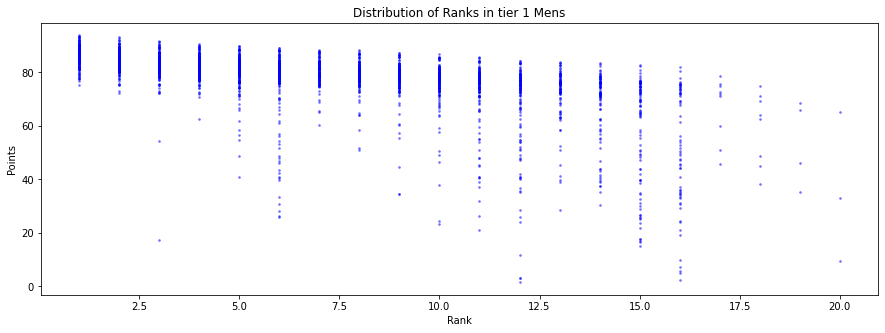

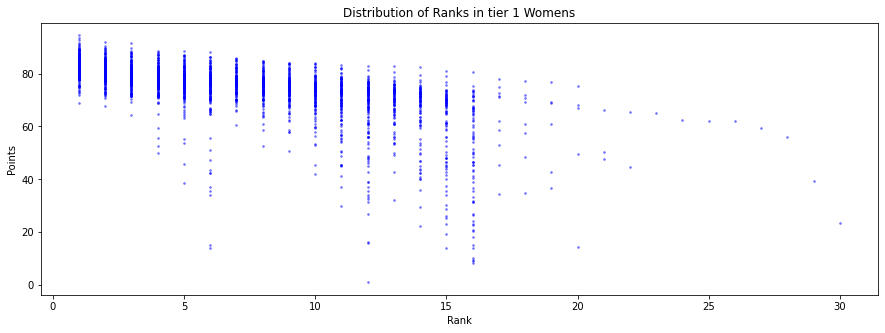

In [4]:
plt.figure(figsize = (15,5))
plt.scatter(tier1_df_M['Finish_Rank'], tier1_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier1_df_W['Finish_Rank'], tier1_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 1 Womens")
plt.show()

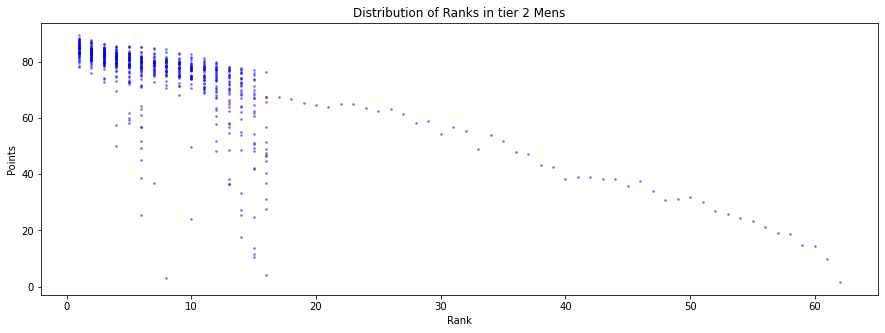

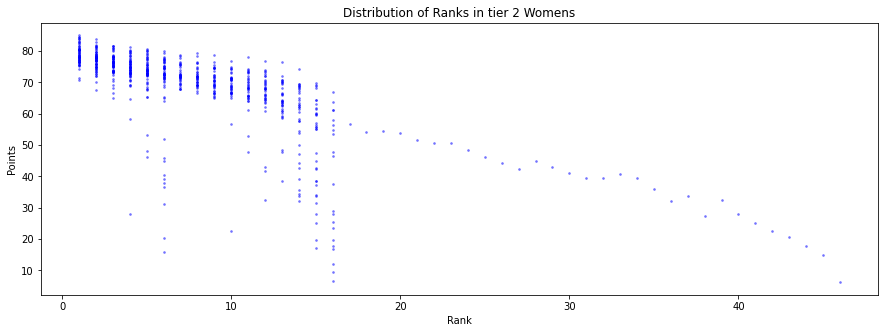

In [44]:
plt.figure(figsize = (15,5))
plt.scatter(tier2_df_M['Finish_Rank'], tier2_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Mens")
plt.show()

plt.figure(figsize = (15,5))
plt.scatter(tier2_df_W['Finish_Rank'], tier2_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
plt.xlabel("Rank")
plt.ylabel("Points")
plt.title("Distribution of Ranks in tier 2 Womens")
plt.show()

In [56]:
# plt.figure(figsize = (15,5))
# plt.scatter(tier3_df_M['Finish_Rank'], tier3_df_M['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
# plt.xlabel("Rank")
# plt.ylabel("Points")
# plt.title("Distribution of Ranks in tier 3 Mens")
# plt.show()

# plt.figure(figsize = (15,5))
# plt.scatter(tier3_df_W['Finish_Rank'], tier3_df_W['Score_Metric'], s =3, c = 'blue', alpha = 0.4)
# plt.xlabel("Rank")
# plt.ylabel("Points")
# plt.title("Distribution of Ranks in tier 3 Womens")
# plt.show()

In [52]:
tier1_df_M.columns

Index(['Athlete_Comp_ID', 'Athlete_name', 'Gender', 'age_yrs', 'Nation',
       'Judge_1_Score', 'Judge_2_Score', 'Judge_3_Score', 'Judge_4_Score',
       'Judge_5_Score', 'Judge_6_Score_1', 'Judge_7_Score_1', 'Major_Finalist',
       'Major_Medalist', 'Olympic_Finalist', 'Olympic_Medalist', 'Temp_Snow',
       'Temp_Air', 'Wind', 'Season', 'Season_Comp', 'Round', 'Score_Metric',
       'Finish_Rank'],
      dtype='object')

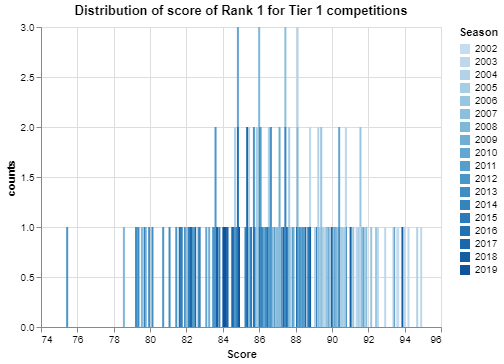

In [123]:
alt.Chart(tier1_df_M).mark_bar(size = 2).encode(
    alt.X('Score_Metric:Q', title = "Score"),
    alt.Y('count()', title = "counts"),
    alt.Color('Season:O'),
    tooltip = ['Season']
).transform_filter(
    "(datum.Finish_Rank == 1)"
).properties(title = "Distribution of score of Rank 1 for Tier 1 competitions")

In [5]:
from scipy.stats import norm
from scipy.stats import poisson

In [62]:
rank = 1
tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == rank].loc[:, 'Score_Metric'].mean()
tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == rank].loc[:, 'Score_Metric'].std()
print(tier1_mean)
print(tier1_std)
tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric']

86.32542713567838
3.65549575096464


181    87.45
182    89.55
188    88.80
189    86.55
190    85.94
198    83.61
206    85.37
207    91.03
210    82.72
227    91.61
240    88.08
264    87.18
297    93.88
306    87.33
311    86.63
322    84.81
328    87.02
347    83.69
359    82.30
Name: Score_Metric, dtype: float64

In [63]:
norm.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric'],
         loc = tier1_mean,
         scale = tier1_std)

array([0.62082146, 0.81114308, 0.75077986, 0.52449334, 0.45801424,
       0.22879104, 0.39690463, 0.90095046, 0.16199218, 0.92586251,
       0.68437997, 0.59242116, 0.98061569, 0.60826953, 0.53320112,
       0.33923154, 0.57534851, 0.23547035, 0.1354051 ])

In [64]:
poisson.cdf(tier1_df_M[(tier1_df_M['Finish_Rank'] == rank) & (tier1_df_M['Season'] == 2018)].loc[:, 'Score_Metric'],
             mu = tier1_mean)

array([0.55727163, 0.63962924, 0.59907861, 0.51465366, 0.47170266,
       0.38678146, 0.47170266, 0.71542125, 0.34578431, 0.71542125,
       0.59907861, 0.55727163, 0.78217888, 0.55727163, 0.51465366,
       0.42891357, 0.55727163, 0.38678146, 0.34578431])

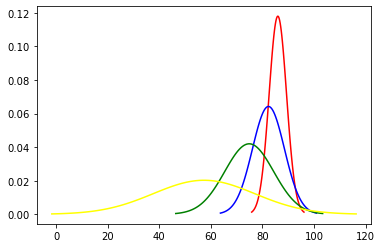

In [68]:
# Plotting cdf for Normal dist
rank = [1,3,10,15]
c = ["red", "blue", "green", "yellow"]

for i, j in zip(rank, c):
    quant_95 =  tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].quantile(0.95)
    tier1_mean = tier1_df_M[(tier1_df_M['Finish_Rank'] == i) & 
                            (tier1_df_M['Score_Metric'] <= quant_95)].loc[:, 'Score_Metric'].mean()
    tier1_std = tier1_df_M[(tier1_df_M['Finish_Rank'] == i) & 
                            (tier1_df_M['Score_Metric'] <= quant_95)].loc[:, 'Score_Metric'].std()

    x = np.linspace(tier1_mean - 3*tier1_std, tier1_mean + 3*tier1_std, 100)
    plt.plot(x, norm.pdf(x, tier1_mean, tier1_std), c = j)
    
plt.show()

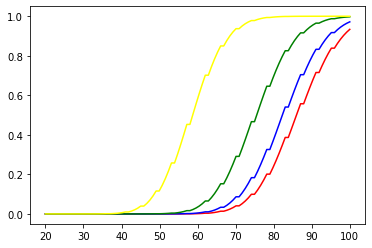

In [69]:
# Plotting cdf for Poisson dist
rank = [1,3,10,15]
c = ["red", "blue", "green", "yellow"]

for i, j in zip(rank, c):
    tier1_mean = tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].mean()
    tier1_std = tier1_df_M[tier1_df_M['Finish_Rank'] == i].loc[:, 'Score_Metric'].std()

    x = np.linspace(20, 100, 100)
    plt.plot(x, poisson.cdf(x, mu = tier1_mean), c = j)
    
plt.show()

In [70]:
Cov =tier1_df_M.groupby(['Finish_Rank'])['Score_Metric'].std() /  tier1_df_M.groupby(['Finish_Rank'])['Score_Metric'].mean()
Cov

Finish_Rank
1     0.042346
2     0.043422
3     0.076364
4     0.049023
5     0.082011
6     0.166910
7     0.055469
8     0.072220
9     0.101692
10    0.126843
11    0.171718
12    0.260831
13    0.141726
14    0.193904
15    0.339508
16    0.433348
17    0.175881
18    0.228244
19    0.297131
20    0.776972
Name: Score_Metric, dtype: float64

## Next steps

- Divide ranks based on Cov >= 0.1 and < 0.1 for each tier
- Use Normal for Cov >= 0.1 and Poisson for < 0.1
- Get percentile / z-score for each rank distribution from 1-15
- Divide the z-score / 0.5 to get the multiplier for a rank for a competition
- Use the avg of rank-10 to rank-15 multiplier as the multiplier as the multiplier for lower ranks
- 